In [1]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from tsfresh import extract_features, select_features  ########outlier detection####################
from tsfresh.utilities.dataframe_functions import impute
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import IsolationForest
from prophet.diagnostics import cross_validation
from sklearn.model_selection import train_test_split
from prophet.diagnostics import performance_metrics
from sklearn.preprocessing import StandardScaler

C:\Users\PCView\anaconda3\envs\Research\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
#Importing the quartely divided dataset
quarter_dom_Pro = pd.read_csv('C:\\Users\\PCView\\Desktop\\Research_code\\Research-Models\\Data\\quarter_data_domestic.csv')
quarter_dom_Pro.head(10)

,Year,DomesticDebt_adjust
0,1990-03-31,14337.301563
1,1990-06-30,14002.819688
2,1990-09-30,14331.459062
3,1990-12-31,15323.219687
4,1991-03-31,16978.101563
5,1991-06-30,15833.919688
6,1991-09-30,15352.859062
7,1991-12-31,15534.919687
8,1992-03-31,16380.101563
9,1992-06-30,17557.744688


In [3]:
quarter_dom_Pro.describe()

,DomesticDebt_adjust
count,1.250000e+02
mean,2.829571e+05
std,4.124739e+05
min,1.400282e+04
25%,6.092432e+04
50%,1.432069e+05
75%,2.969380e+05
max,2.072655e+06


* Before fitting the **prophet model** it is required to have 2 columns namely as "ds" and "y" so we are going to rename our dataframe columns.

In [4]:
#Renaming the 2 columns
quarter_dom_Pro = quarter_dom_Pro.rename(columns={'Year ':'ds','DomesticDebt_adjust':'y'})
quarter_dom_Pro.head(10)

,ds,y
0,1990-03-31,14337.301563
1,1990-06-30,14002.819688
2,1990-09-30,14331.459062
3,1990-12-31,15323.219687
4,1991-03-31,16978.101563
5,1991-06-30,15833.919688
6,1991-09-30,15352.859062
7,1991-12-31,15534.919687
8,1992-03-31,16380.101563
9,1992-06-30,17557.744688


In [5]:
quarter_dom_Pro

,ds,y
0,1990-03-31,1.433730e+04
1,1990-06-30,1.400282e+04
2,1990-09-30,1.433146e+04
3,1990-12-31,1.532322e+04
4,1991-03-31,1.697810e+04
...,...,...
120,2020-03-31,1.751716e+06
121,2020-06-30,1.830956e+06
122,2020-09-30,1.910859e+06
123,2020-12-31,1.991425e+06


In [6]:
#Creating an instance of the Prophet Model
model_prop = Prophet(daily_seasonality = True)

In [7]:
quarter_dom_Pro=quarter_dom_Pro.set_index('ds')

In [8]:
is_year_index = 'ds' in quarter_dom_Pro.index.names
print(is_year_index)

True


In [9]:
# Standardize features
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [10]:
scaled_data = scaler.fit_transform(quarter_dom_Pro)

scaled_data = scaler.fit_transform(train.values.reshape(-1, 1)).flatten()
#scaled_data = scaler.fit_transform(quarter_dom_Pro.values.reshape(-1, 1)).flatten()

In [11]:
scaled_data

array([[-6.53861425e-01],
       [-6.54675605e-01],
       [-6.53875646e-01],
       [-6.51461550e-01],
       [-6.47433316e-01],
       [-6.50218429e-01],
       [-6.51389403e-01],
       [-6.50946240e-01],
       [-6.48888939e-01],
       [-6.46022376e-01],
       [-6.41541676e-01],
       [-6.35446837e-01],
       [-6.27737860e-01],
       [-6.21970945e-01],
       [-6.14589891e-01],
       [-6.05594699e-01],
       [-5.94985369e-01],
       [-5.99672589e-01],
       [-6.02745671e-01],
       [-6.04204615e-01],
       [-6.04049422e-01],
       [-5.96866803e-01],
       [-5.88070046e-01],
       [-5.77659151e-01],
       [-5.65634119e-01],
       [-5.79909038e-01],
       [-5.92569820e-01],
       [-6.03616463e-01],
       [-6.13048969e-01],
       [-5.90467295e-01],
       [-5.66271483e-01],
       [-5.40461533e-01],
       [-5.13037445e-01],
       [-5.13320249e-01],
       [-5.11988916e-01],
       [-5.09043444e-01],
       [-5.04483834e-01],
       [-4.80358056e-01],
       [-4.5

In [12]:
# Standardize features
# Create a new DataFrame with the scaled values and associated years
scaled_df = pd.DataFrame(scaled_data,columns=quarter_dom_Pro.columns, index=quarter_dom_Pro.index)
scaled_df

,y
ds,
1990-03-31,-0.653861
1990-06-30,-0.654676
1990-09-30,-0.653876
1990-12-31,-0.651462
1991-03-31,-0.647433
...,...
2020-03-31,3.575182
2020-06-30,3.768065
2020-09-30,3.962561


In [13]:
scaled_df = scaled_df.reset_index(drop=False)

In [14]:
scaled_df

,ds,y
0,1990-03-31,-0.653861
1,1990-06-30,-0.654676
2,1990-09-30,-0.653876
3,1990-12-31,-0.651462
4,1991-03-31,-0.647433
...,...,...
120,2020-03-31,3.575182
121,2020-06-30,3.768065
122,2020-09-30,3.962561
123,2020-12-31,4.158672


In [15]:
#Fitting the model
model_prop.fit(scaled_df)

12:12:20 - cmdstanpy - INFO - Chain [1] start processing
12:12:21 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
#Generating future dates for making predictions to check accuracy
quarters = 0 #number of quarters into the future
future_dates = model_prop.make_future_dataframe(periods=quarters,freq='Q')  # Generate 365 days of future dates
future_dates

,ds
0,1990-03-31
1,1990-06-30
2,1990-09-30
3,1990-12-31
4,1991-03-31
...,...
120,2020-03-31
121,2020-06-30
122,2020-09-30
123,2020-12-31


C:\Users\PCView\anaconda3\envs\Research\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PCView\anaconda3\envs\Research\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


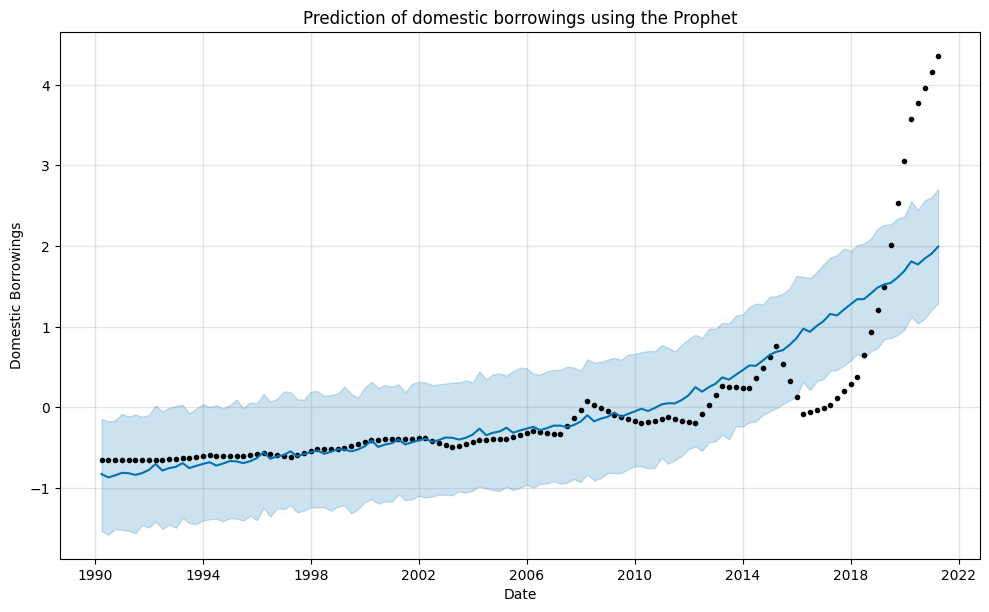

In [17]:
#Making predictions from the model
predictions = model_prop.predict(future_dates)
#predictions_original = scaler.inverse_transform(predictions)
#predictions
model_prop.plot(predictions)
plt.title("Prediction of domestic borrowings using the Prophet")
plt.xlabel("Date")
plt.ylabel("Domestic Borrowings")
plt.show()

In [18]:
# predictions

In [19]:
# Extract the relevant columns from predictions dataframe
predicted_values = predictions[['ds', 'yhat']]

# Filter the predicted values for the future dates (quarters)
future_predictions = predicted_values[predicted_values['ds'].dt.to_period('Q').isin(future_dates['ds'].dt.to_period('Q'))]

# Rename the columns to appropriate names
future_predictions.columns = ['Date', 'DomesticBorrowingsTotalAdjusted']

# Reset the index
future_predictions.reset_index(drop=True, inplace=True)

In [20]:
future_predictions

,Date,DomesticBorrowingsTotalAdjusted
0,1990-03-31,-0.825369
1,1990-06-30,-0.866779
2,1990-09-30,-0.841642
3,1990-12-31,-0.810283
4,1991-03-31,-0.814575
...,...,...
120,2020-03-31,1.810283
121,2020-06-30,1.772096
122,2020-09-30,1.845120
123,2020-12-31,1.905039


In [21]:
#train_data, test_data = train_test_split(quarter_dom_Pro['ds'], train_size=0.8)

model_prop_1 = Prophet(daily_seasonality = True)
model_prop_1.fit(quarter_dom_Pro)

#Generating future dates for making predictions to check accuracy
quarters = 0 #number of quarters into the future
future_dates = model_prop_1.make_future_dataframe(periods=quarters,freq='Q') 
future_dates

#Making predictions from the model after dropping the outliers
predictions = model_prop_1.predict(future_dates)
#predictions
model_prop_1.plot(predictions)
plt.title("Domestic Borrowing value prediction")
plt.xlabel("Date")
plt.ylabel("Domestic Borrowing value")
plt.show()

# Extract the relevant columns from predictions dataframe
predicted_values = predictions[['ds', 'yhat']]

# Filter the predicted values for the future dates (quarters)
future_predictions = predicted_values[predicted_values['ds'].dt.to_period('Q').isin(future_dates['ds'].dt.to_period('Q'))]

# Rename the columns to appropriate names
future_predictions.columns = ['Date', 'DomesticBorrowingsTotalAdjusted']

# Reset the index
future_predictions.reset_index(drop=True, inplace=True)

future_predictions

In [22]:
# Calculating mean absolute percentage error (MAPE)
mape = np.mean(np.abs((scaled_df['y'] - predictions['yhat']) /scaled_df['y'])) * 100
mape

1226.6118501996868

In [23]:
scaled_df['y'].sum()

-5.329070518200751e-15

In [24]:
predictions['yhat']

0     -0.825369
1     -0.866779
2     -0.841642
3     -0.810283
4     -0.814575
         ...   
120    1.810283
121    1.772096
122    1.845120
123    1.905039
124    1.992960
Name: yhat, Length: 125, dtype: float64

In [25]:
original_preds = scaler.inverse_transform(predictions[['yhat']])
original_preds

array([[-5.61213873e+04],
       [-7.31334844e+04],
       [-6.28069196e+04],
       [-4.99238421e+04],
       [-5.16870479e+04],
       [-6.05933550e+04],
       [-5.11769177e+04],
       [-3.51826278e+04],
       [-4.90370723e+03],
       [-3.82070831e+04],
       [-2.60161800e+04],
       [-1.92088326e+04],
       [-5.10558433e+02],
       [-2.56587268e+04],
       [-1.44061915e+04],
       [-4.58725469e+03],
       [ 3.89705543e+03],
       [-1.31150417e+04],
       [-2.78847700e+03],
       [ 1.00946004e+04],
       [ 8.33139451e+03],
       [-5.74912606e+02],
       [ 8.84152461e+03],
       [ 2.48358144e+04],
       [ 5.51147349e+04],
       [ 2.18113590e+04],
       [ 3.40022621e+04],
       [ 4.08096094e+04],
       [ 5.95078836e+04],
       [ 3.43597152e+04],
       [ 4.56122507e+04],
       [ 5.54311875e+04],
       [ 6.39154977e+04],
       [ 4.69034006e+04],
       [ 5.72299654e+04],
       [ 7.01130429e+04],
       [ 6.83498371e+04],
       [ 5.94435302e+04],
       [ 6.8

test_scaled.shape

In [26]:
predictions['yhat'].shape

(125,)

In [27]:
import pandas as pd

# Assuming you have a DataFrame 'df' and you want to make the 'Year' column as the index
scaled_df.set_index('ds', inplace=True)

# Now, the 'Year' column is set as the index of the DataFrame.


In [28]:
#Calculating the mean squared error (MSE)
RMSE = mean_squared_error(scaled_df, predictions['yhat'],squared=False)

In [29]:
RMSE

0.5506630944507064

In [30]:
# Calculate MAE
mae = mean_absolute_error(scaled_df, predictions['yhat'])
mae

0.2837819625502985

# Future predictions

In [31]:
#Generating future dates for making predictions to check accuracy
quarters = 32 #number of quarters into the future
future_dates = model_prop.make_future_dataframe(periods=quarters,freq='Q')  # Generate 365 days of future dates
future_dates

,ds
0,1990-03-31
1,1990-06-30
2,1990-09-30
3,1990-12-31
4,1991-03-31
...,...
152,2028-03-31
153,2028-06-30
154,2028-09-30
155,2028-12-31


In [32]:
predictions = model_prop.predict(future_dates)

# Extract the relevant columns from predictions dataframe
predicted_values = predictions[['ds', 'yhat']]

# Filter the predicted values for the future dates (quarters)
future_predictions = predicted_values[predicted_values['ds'].dt.to_period('Q').isin(future_dates['ds'].dt.to_period('Q'))]

# Rename the columns to appropriate names
future_predictions.columns = ['Date', 'Predictions']

# Reset the index
future_predictions.reset_index(drop=True, inplace=True)

future_predictions

,Date,Predictions
0,1990-03-31,-0.825369
1,1990-06-30,-0.866779
2,1990-09-30,-0.841642
3,1990-12-31,-0.810283
4,1991-03-31,-0.814575
...,...,...
152,2028-03-31,3.479280
153,2028-06-30,3.441092
154,2028-09-30,3.514116
155,2028-12-31,3.574036


In [33]:
original_preds = scaler.inverse_transform([future_predictions['Predictions']])
original_preds = original_preds.flatten()
for i in range(125, 157):
    print(original_preds[i])

1094173.2912781811
1123234.5780699654
1150862.2663120208
1176768.1811157793
1177371.2620568986
1205506.5782724933
1236198.4071605105
1251856.8059912147
1260565.676970592
1287790.8656691103
1321593.906917835
1369488.0055383677
1353799.8077317534
1383799.4622371132
1408415.5610459207
1444535.4398747908
1437002.449556703
1466063.736348456
1493691.4245905196
1519597.3393942458
1520200.4203354164
1548335.7365509628
1579027.5654389774
1594685.9642698264
1603394.8352491048
1630620.0239476091
1664423.0651962883
1712317.1638169335
1696628.9660102746
1726628.6205155726
1751244.719324463
1787364.598153211


In [34]:
df_cv = cross_validation(model_prop, initial='281 days', period='90 days', horizon = '1095 days')
df_cv

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/111 [00:00<?, ?it/s]12:12:22 - cmdstanpy - INFO - Chain [1] start processing
12:12:22 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/111 [00:00<01:00,  1.82it/s]12:12:23 - cmdstanpy - INFO - Chain [1] start processing
12:12:24 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 2/111 [00:02<02:02,  1.12s/it]12:12:24 - cmdstanpy - INFO - Chain [1] start processing
12:12:24 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 3/111 [00:02<01:37,  1.10it/s]12:12:25 - cmdstanpy - INFO - Chain [1] start processing
12:12:32 - cmdstanpy - INFO - Chain [1] done processing
  4%|▎         | 4/111 [00:10<06:23,  3.58s/it]12:12:33 - cmdstanpy - INFO - Chain [1] start processing
12:12:33 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 5/111 [00:11<04:40,  2.65s/it]12:12:34 - cmdstanpy - INFO - Chain [1] start processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1991-03-31,-1.038752,-1.038752,-1.038752,-0.647433,1991-02-22
1,1991-06-30,-1.131396,-1.131396,-1.131396,-0.650218,1991-02-22
2,1991-09-30,-0.931976,-0.931976,-0.931976,-0.651389,1991-02-22
3,1991-12-31,-1.293210,-1.293210,-1.293210,-0.650946,1991-02-22
4,1992-03-31,-1.488000,-1.488000,-1.488000,-0.648889,1991-02-22
...,...,...,...,...,...,...
1326,2020-03-31,0.305481,0.122390,0.482586,3.575182,2018-04-01
1327,2020-06-30,0.307993,0.134575,0.488247,3.768065,2018-04-01
1328,2020-09-30,0.316618,0.128853,0.495378,3.962561,2018-04-01
1329,2020-12-31,0.327244,0.136775,0.521934,4.158672,2018-04-01


In [35]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,121 days,0.023218,0.152376,0.096362,2.821693,0.122413,0.441097,0.360902
1,122 days,0.023273,0.152556,0.096833,2.824061,0.128900,0.442979,0.360902
2,124 days,0.023524,0.153376,0.097992,2.834099,0.132514,0.448572,0.360902
3,126 days,0.024077,0.155167,0.099810,2.909278,0.134425,0.460477,0.360902
4,127 days,0.024957,0.157978,0.101899,2.941540,0.134425,0.474072,0.360902
...,...,...,...,...,...,...,...,...
776,1089 days,0.692962,0.832444,0.389384,4.097390,0.473860,0.771235,0.203008
777,1090 days,0.772957,0.879179,0.412351,2.810866,0.469861,0.766812,0.203008
778,1091 days,0.862802,0.928871,0.437031,2.810328,0.455722,0.776122,0.203008
779,1093 days,0.963054,0.981353,0.464853,2.817414,0.473860,0.790713,0.195489


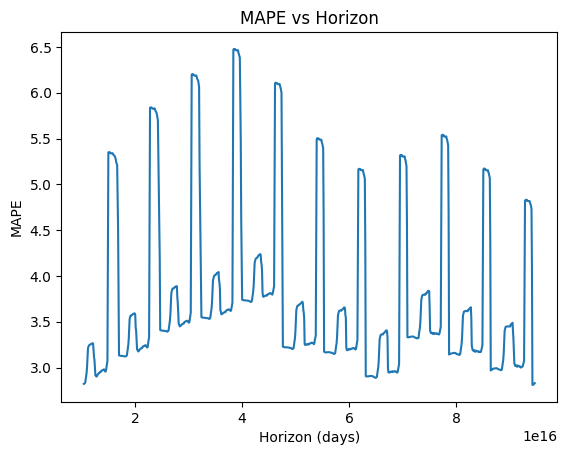

In [36]:
plt.plot(df_p['horizon'], df_p['mape'])
plt.xlabel('Horizon (days)')
plt.ylabel('MAPE')
plt.title('MAPE vs Horizon')
plt.show()